# COMP47700 Speech and Audio PL5: Speech and Audio Quality

* Conduct an experiment on speech data
* Aggregate results from a csv file to compare the results from predictive models to the "ground truth" human annotated targets
* Plot and interpret the trends
* Run simple quality tests using time domain quality scores and evaluate the results


Reference Article:

[N. Harte, E.Gillen, A. Hines. TCD-VoIP, a Research Database of Degraded Speech for Assessing Quality in VoIP Applications. In Quality of Multimedia Experience (QoMEX), Seventh International Workshop on, Costa Navarino, Greece, 2015.](https://ieeexplore.ieee.org/abstract/document/7148100)

[A. Hines, E. Gillen, N. Harte. Measuring and Monitoring Speech Quality for Voice over IP with POLQA, ViSQOL and P.563. In Interspeech, Dresden, 2015.](https://www.isca-speech.org/archive/interspeech_2015/i15_0438.html)

## Learning Outcomes
* Analyse speech and audio signals and feature
* Create programmes to conduct experiments on speech and audio samples building on third software libraries

## Module Topics
Advanced topics Speech and Audio Quality

*   Speech and Audio Quality
*   Objective models of intelligibility and quality

## Why is it important?
* Data analysis and visualisation of advanced audio applications
* Using audio algorithms standardised by software and telecommunications industry e.g., [POLQA](https://en.wikipedia.org/wiki/Perceptual_Objective_Listening_Quality_Analysis)
* Understanding perceptual audio concepts: mean opinion score
* Reflecting on mathematical tools used to measure audio quality e.g., signal-to-noise ratio (SNR), mean squared error (MSE)

## Structure of this tutorial
This practical tutorial contains different sections:
* **Live coding:** Basic theory, demos and coding examples presented by the lecturer on site (unmarked)
* **Student activity:** Familiarisation and coding exercises to be completed by the students and followed by a short discussion on site (unmarked). These activities introduce key concepts and skills necessary to complete the assignments.
* **Assignment:** Two (2) take home problem/coding questions to be completed by the students by (see Unit 2 brightspace). Assignment questions represent fifteen (15) mark points.

>[COMP47700 Speech and Audio PL5: Speech and Audio Quality](#scrollTo=Jr6fAIbcx_57)

>>[Learning Outcomes](#scrollTo=ehzkExPIaHVR)

>>[Module Topics](#scrollTo=ehzkExPIaHVR)

>>[Why is it important?](#scrollTo=ehzkExPIaHVR)

>>[Structure of this tutorial](#scrollTo=ehzkExPIaHVR)

>>[Setup](#scrollTo=xygOaXDpnd6Q)

>>>[Uploading files from local system](#scrollTo=Cn_b75kjeaxj)

>>>[Data info](#scrollTo=Mo9ZW5RCe0Dn)

>[SNR and MSE](#scrollTo=ClJrF3Bsfdx-)

>>[Live coding: SNR](#scrollTo=Ewo-Bt7ewyt0)

>>>[Signal-to-noise Ratio (SNR)](#scrollTo=Ewo-Bt7ewyt0)

>>>>[Signal-to-noise Ratio (SNR) for quality assessment](#scrollTo=Ewo-Bt7ewyt0)

>>[Student Activity: MSE](#scrollTo=w1RvmF5s0OZi)

>>>>[Mean Squared Error (MSE)](#scrollTo=w1RvmF5s0OZi)

>>>>[Mean Squared Error (MSE) for quality assessment](#scrollTo=w1RvmF5s0OZi)

>>[Student Activity: Table 1](#scrollTo=S0r-4HmFx_6D)

>[Comparing Speech Quality Metrics](#scrollTo=LI_JvuWm--dW)

>>[Live Coding: Plot Figure 1](#scrollTo=4Zro5W8wx_6E)

>>[Student Activity: Plot Figure 2](#scrollTo=8qpLToWXx_6F)

>[Assignment Part 1 [10pt]](#scrollTo=vM1hkzjox_6G)

>[Assignment Part 2 [5pt]](#scrollTo=u1eULNaNCARe)



## **Setup**

In [ ]:
#Imports and Magic

import librosa
import librosa.display
import librosa.core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import fftpack
from os import listdir
import os
import IPython.display as ipd

%matplotlib inline

### Uploading files from local system
We will upload and extract the content from the zip file provided with the assigment (Brightspace -> Assignment Questions PL5).
1. Import the library `files` from Google Colab
2. From your local system, select the .zip file provided for PL5 (`PL5_files.zip`)
3. Using the `zipfile` library, extract the files to your Google Colab environment (`./PL5_files/`).

In [ ]:
from google.colab import files
zipname = 'PL5_files.zip'
# If the command below fails, upload the file manually and run the next cell
#uploaded = files.upload()

In [ ]:
import zipfile
# Extract the zip file
with zipfile.ZipFile(zipname, 'r') as zip_ref:
  zip_ref.extractall()  # Extract all files to the current directory

### Data info
There are a number of wav files in the sub-directory tcdvoipdata.
The tcdvoipdata contains a small comma separated value (CSV) dataset that has been extracted from the larger TCD-VOIP (Harte et al., 2015, Hines et al. 2015) corpus. It lists the name of the reference file (uncorrupted), the degraded file, the subjective quality MOS ratings (mean opinion scores) from 24 listeners. It also gives the estimated MOS scores from two objective metrics, P.563 and POLQA. P.563 is a no reference metric meaning is calculates the score without access to the original. POLQA is a full reference quality metric meaning that compares the reference and degraded files.

# SNR and MSE

Create two functions that compute
1.   Signal-to-noise ratio (SNR)
2.   Mean squared error (MSE)



In [ ]:
# *** Upload CSV file -> [Ref, Test, MOS, P563, POLQA] ***

# Define root directory
root = './tcdvoipdata/'

# Store csv to a dataframe and set 'Test' as index
df = pd.read_csv(os.path.join(root, 'tcdvoipextractmos.csv'))

# Show top rows
df

                Ref              Test  MOS      p563   polqa
0  R_03_ECHO_ML.wav  C_03_ECHO_ML.wav  4.5  3.300488  4.7497
1  R_11_ECHO_MK.wav  C_11_ECHO_MK.wav  3.5  3.144342  3.0848
2  R_13_ECHO_FA.wav  C_13_ECHO_FA.wav  2.5  3.001977  2.3985
3  R_16_ECHO_FA.wav  C_16_ECHO_FA.wav  1.5  2.248704  2.7717
4  R_02_CHOP_FA.wav  C_02_CHOP_FA.wav  4.5  2.809434  4.7497


## **Live coding**: SNR
### **Signal-to-noise Ratio (SNR)**

$SNR_{db} = 10log_{10} \frac{X}{X_{ref}}$

---------------------------------------------------------------

#### **Signal-to-noise Ratio (SNR) for quality assessment**
$x[n]$ -> Clean signal

$y[n]$ -> Corrupted/degraded signal


$SNR_{db} = 10log_{10} \frac{\sum\limits_{n=1}^{N}x[n]^2}{\sum\limits_{n=1}^{N}(x[n] - y[n])^2}$

In [ ]:
def computeSNR(P,Q):
    # Limit SNR in range of -20 to +40 dB
    MIN_SNR, MAX_SNR = -20.0, 40.0

    # Make sure P and Q are the same size
    len = min(P.size, Q.size)
    P = P[0:len]
    Q = Q[0:len]

    # Compute SNR
    overall_snr = 10 * np.log10(np.sum(np.power(P, 2)) / np.sum(np.power(P - Q + np.spacing(1), 2)))

    # Clip SNR
    overall_snr = np.max([MIN_SNR, overall_snr])
    overall_snr = np.min([MAX_SNR, overall_snr])

    return overall_snr

## **Student Activity**: MSE
#### **Mean Squared Error (MSE)**

$MSE = \frac{1}{N}\sum\limits_{n=1}^{N} (X[n] - \hat{X}[n])^2$

---------------------------------------------------------------

#### **Mean Squared Error (MSE) for quality assessment**
$x[n]$ -> Clean signal

$y[n]$ -> Corrupted/degraded signal


$MSE = \frac{1}{N}\sum\limits_{n=1}^{N} (x[n] - y[n])^2$


In [ ]:
def computeMSE(P,Q):
    # Make sure P and Q are the same size
    len = min(P.size, Q.size)
    P = P[0:len]
    Q = Q[0:len]

    # Compute MSE
    overall_mse = ((P - Q) ** 2).mean(axis=0)

    return overall_mse

## **Student Activity**: Table 1

Compute and record the SNR and MSE scores for the test samples in the dataframe.

In [ ]:
# ***Read the data from the wav files, compute the MSE and SNR scores for each test pair***

# Create lists to store values
snr, mse = [], []
sr = None

# Loop
for i, row in df.iterrows():
    s_ref, sr1 = librosa.load(os.path.join(root, row.Ref), sr=sr)
    s_ref = librosa.util.normalize(s_ref)
    s_test, sr2 = librosa.load(os.path.join(root, row.Test), sr=sr)
    s_test = librosa.util.normalize(s_test)

    snr.append(np.round(computeSNR(s_ref,s_test), 1))
    mse.append(np.round(computeMSE(s_ref,s_test), 3))

df['SNR'], df['MSE'] = snr, mse

df

,Ref,Test,MOS,p563,polqa,SNR,MSE,Cond
0,R_03_ECHO_ML.wav,C_03_ECHO_ML.wav,4.5,3.300488,4.7497,40.0,0.000,ECHO
1,R_11_ECHO_MK.wav,C_11_ECHO_MK.wav,3.5,3.144342,3.0848,15.0,0.000,ECHO
2,R_13_ECHO_FA.wav,C_13_ECHO_FA.wav,2.5,3.001977,2.3985,10.7,0.001,ECHO
3,R_16_ECHO_FA.wav,C_16_ECHO_FA.wav,1.5,2.248704,2.7717,14.4,0.000,ECHO
4,R_02_CHOP_FA.wav,C_02_CHOP_FA.wav,4.5,2.809434,4.7497,-3.4,0.019,CHOP
5,R_09_CHOP_ML.wav,C_09_CHOP_ML.wav,3.5,3.487644,3.5388,-3.0,0.009,CHOP
6,R_19_CHOP_MK.wav,C_19_CHOP_MK.wav,2.5,2.848288,2.3639,-2.4,0.019,CHOP
7,R_20_CHOP_MK.wav,C_20_CHOP_MK.wav,1.9,3.709837,2.0934,6.8,0.001,CHOP
8,R_01_CLIP_ML.wav,C_01_CLIP_ML.wav,4.5,3.705476,4.7497,40.0,0.000,CLIP
9,R_07_CLIP_FA.wav,C_07_CLIP_FA.wav,3.5,2.881423,2.4449,-10.9,0.069,CLIP


# Comparing Speech Quality Metrics

## **Live Coding**: Plot Figure 1

Plot a figure with the subjective quality MOS (mean opinion scores) on the x-axis and the objective measurements on the y-axis.

    (a) "No reference" speech quality metric: P.563
    (b) "Full reference" speech quality metric: POLQA
    (c) Time signal mean squared error (MSE)
    (d) Signal to Noise Ratio (SNR)

In [ ]:
def plotMOSScatter(ax, x, y , xlabel='MOS', ylabel='MOS-LQO', titletxt='MOS Plot', xrange=(1,5), yrange=(1,5)):

    # Draw scatter plot in ax[]
    ax.scatter(x,y)

    # Limit both axis to the MOS range (1,5)
    ax.set_xlim(xrange)
    ax.set_ylim(yrange)

    # Draw grid
    ax.grid(axis='both')

    # Label both axis
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Set plot title
    ax.set_title(titletxt)

    # Use 5 ticks 1,2,3,4,5 for MOS
    xtickrange=range(xrange[0], xrange[1]+1)
    ax.set_xticks(xtickrange, xtickrange)

    # Use 5 ticks 1,2,3,4,5 for Objective MOS (POLQA, P563)
    if type(yrange[1]) is int:
      ytickrange = range(yrange[0], yrange[1] + 1)
      ax.set_yticks(ytickrange, ytickrange)


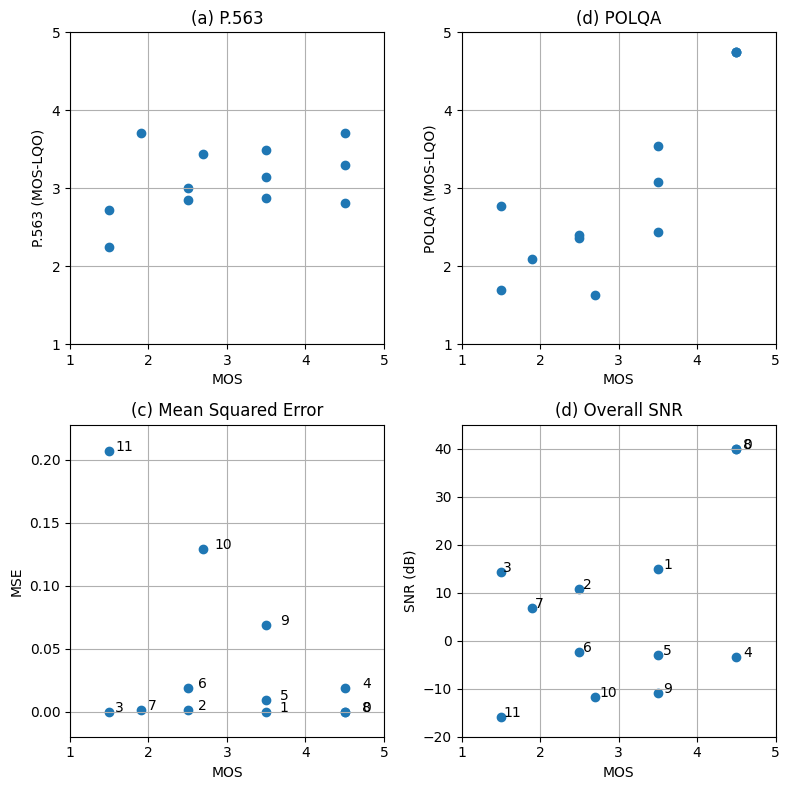

In [ ]:
# Create Figure
fig,axs = plt.subplots(2, 2, figsize=(8, 8))

# P563 plot
plotMOSScatter(axs[0,0], df.MOS, df.p563, 'MOS', 'P.563 (MOS-LQO)', '(a) P.563')

# POLQA plot
plotMOSScatter(axs[0,1], df.MOS, df.polqa, 'MOS', 'POLQA (MOS-LQO)', '(d) POLQA')

# MSE plot
plotMOSScatter(axs[1,0], df.MOS, df.MSE, 'MOS', 'MSE', '(c) Mean Squared Error', xrange=(1,5), yrange=(np.min(df.MSE)-.02, np.max(df.MSE)*1.1))
# plot the index beside the clip samples
for i, row in df.iterrows():
    axs[1,0].text(row.MOS*1.05,row.MSE,str(i))

# SNR plot
plotMOSScatter(axs[1,1],df.MOS,df.SNR,'MOS','SNR (dB)','(d) Overall SNR',xrange=(1,5),yrange=(-20.0,45.0))
# plot the index beside the clip samples
for i, row in df.iterrows():
        axs[1,1].text(row.MOS*1.02,row.SNR,str(i))

# save and display the figure
plt.tight_layout()
plt.savefig('mosscatter.pdf')
plt.show()

## **Student Activity**: Plot Figure 2

Plot the reference signals to the left and the corresponding test signals to the right. The dataframe index numbers are to the left of the reference signals and the mean opinion score (MOS) quality rating for the test signals is to the left of the test signal.

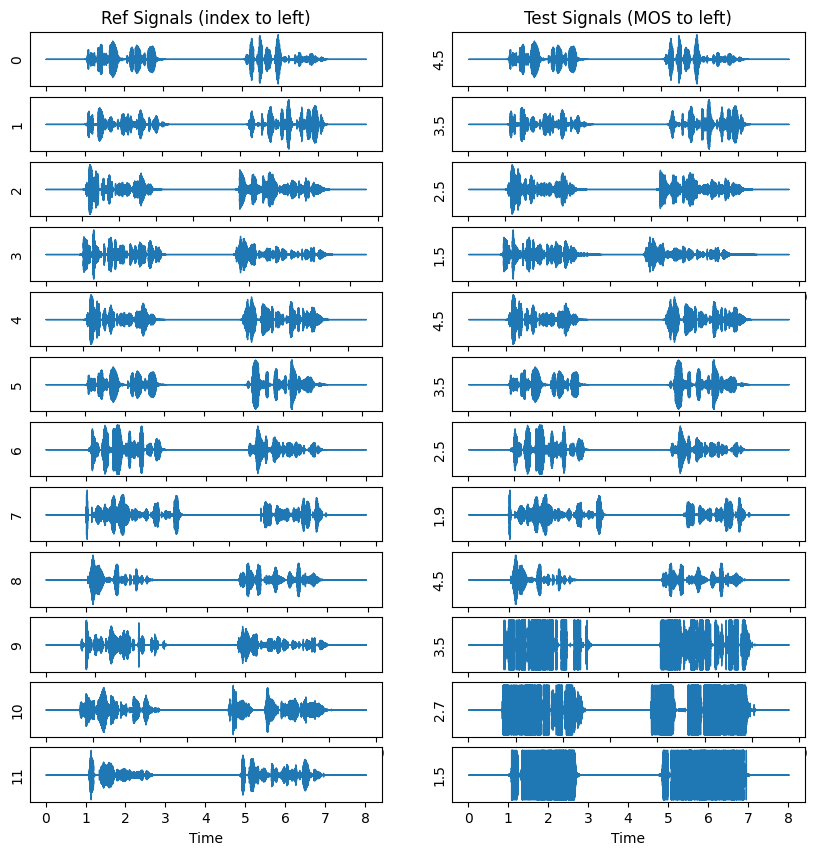

In [ ]:
fig,axs = plt.subplots(12, 2, figsize=(10, 10))

axs[0,0].set_title('Ref Signals (index to left)')
axs[0,1].set_title('Test Signals (MOS to left)')
for i, row in df.iterrows():

    s_ref, sr1 = librosa.load(root + row.Ref, sr=None)
    s_ref = librosa.util.normalize(s_ref)
    s_test, sr2 = librosa.load(root + row.Test, sr=None)
    s_test = librosa.util.normalize(s_test)

    librosa.display.waveshow(s_ref,sr=sr1, ax=axs[i,0])
    axs[i,0].set_ylabel(str(i))
    axs[i,0].set_yticks([])
    librosa.display.waveshow(s_test,sr=sr1, ax=axs[i,1])
    axs[i,1].set_ylabel(str(row.MOS))
    axs[i,1].set_yticks([])


plt.savefig('signals.png')
plt.show()



# Assignment Part 1 [10pt]

P.563 and POLQA results for the 12 test samples evaluated and presented in table 1 are shown in Figure 1(a) and Figure 1(b). Examine Figure 1 and answer the questions below.

(a)   Which model is giving better results, i.e. which model has the strongest correlation with the MOS scores?

(b)  Give a reason why this might this be the case?

(c)  Which type condition (e.g. ECHO, CLIP etc.) does POLQA tend to under predict quality for?

(d)  Plot Figure 1 adapting it to highlight the different conditions in different colours and supply a legend. See hint below to help get you started.

In [ ]:
# Hint --> Create a new column 'Cond' for conditions
df['Cond'] = [filename.split('_')[2] for filename in df.Test.to_list()]

# Assignment Part 2 [5pt]

Answer the following questions with reference to code above and by running and adapting the code in the notebook.

(a) Why does the code to compute the SNR and MSE set the length of the test signals to be the same? Where is this done in the code listing?

(b) Why is there an inverse relationship between the MOS and MSE for CLIP conditions?

(c) Would you consider it good at clipping detection? Why is MSE poor at detecting conditions other than CLIP?

(d) What trends do you see in the SNR detection? Do the results share some characteristics with MSE?

(e) Why do you think the code might be limiting the SNR range at the beginning of the  computeSNR(P,Q) function definion?

(f) What do you think is the purpose of the np.spacing(1) in the SNR computation?
        
